# Load Data

In [3]:
import pandas as pd

import dateutil.parser as dparser
import warnings
warnings.simplefilter("ignore", UserWarning)
from tqdm import tqdm

from ipyleaflet import Map, Polyline

import os
import gpxpy 
from fit2gpx import Converter, StravaConverter
import fitdecode

from features.utils import *


In [2]:
data = loadData()
data.head()

,ID de l'activité,Date de l'activité,Nom de l'activité,Type d'activité,Description de l'activité,Temps écoulé,Mesure d'effort,Équipement utilisé pour l'activité,Nom du fichier,Poids de l'athlète,...,Puissance moyenne pondérée,Nombre d'échantillons de puissance,Humidité,Vitesse du vent,Couverture nuageuse,Indice UV,Date,Time,Week,Month
0,102155537,27 déc. 2013 à 12:35:59,Enfin la reprise !,Vélo,NaN,51.60,NaN,NaN,activities/102155537.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-27,12:35:59,52,12
1,102581269,29 déc. 2013 à 12:06:22,"I2/3, pointes I4",Vélo,NaN,92.28,NaN,NaN,activities/102581269.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-29,12:06:22,52,12
2,103191732,1 janv. 2014 à 11:22:39,SG / I2 en souplesse,Vélo,NaN,145.17,NaN,NaN,activities/103191732.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01,11:22:39,1,1
3,104215700,5 janv. 2014 à 12:17:58,SG à I3 - avec Nico et Pascal,Vélo,NaN,197.43,NaN,NaN,activities/104215700.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05,12:17:58,1,1
4,106526947,15 janv. 2014 à 12:32:41,Sortie club - Fartlek,Vélo,NaN,156.48,NaN,NaN,activities/106526947.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-15,12:32:41,3,1


In [8]:
data.columns

Index(['ID de l'activité', 'Date de l'activité', 'Nom de l'activité',
       'Type d'activité', 'Description de l'activité', 'Temps écoulé',
       'Mesure d'effort', 'Équipement utilisé pour l'activité',
       'Nom du fichier', 'Poids de l'athlète', 'Poids du vélo',
       'Durée de déplacement', 'Distance', 'Vitesse max.', 'Vitesse moyenne',
       'Dénivelé positif', 'Dénivelé négatif', 'Altitude min.',
       'Altitude max.', 'Pente max.', 'Pente moyenne', 'Cadence max.',
       'Cadence moyenne', 'Fréquence cardiaque maximum',
       'Fréquence cardiaque moyenne', 'Puissance moyenne', 'Calories',
       'Température moyenne', 'Puissance moyenne pondérée',
       'Nombre d'échantillons de puissance', 'Humidité', 'Vitesse du vent',
       'Couverture nuageuse', 'Indice UV', 'Date', 'Time', 'Week', 'Month'],
      dtype='object')

# TEST FUNCTIONS

In [71]:
from features.create_csv import *

import pandas as pd
import os
from tqdm import tqdm

import gpxpy 
from fit2gpx import Converter, StravaConverter
import fitdecode
import plotly.io as pio

from garmin_fit_sdk import Decoder, Stream
import fitparse

from tcxreader.tcxreader import TCXReader, TCXTrackPoint

In [6]:
## Paths
DIR_STRAVA = 'data/'
directory = "data/activities/"
activities_file = "data/activities.csv"
csv_directory = "data/activities_csv/"

#### Unzip Data

In [8]:
unzip_strava_export(DIR_STRAVA)

#### Handle .gpx files

In [4]:
read_gpx_files_indiv(directory)

100%|██████████| 2332/2332 [01:44<00:00, 22.41it/s] 

Done


#### Handle .fit files

In [4]:
read_fit_files(directory)

2245it [38:46,  1.53s/it]

8952687437.fit has an issue with TypeError, moving on to the next file


2248it [38:53,  1.93s/it]

8965845812.fit has an issue with TypeError, moving on to the next file


2253it [39:01,  2.01s/it]

8991794536.fit has an issue with TypeError, moving on to the next file


2257it [39:05,  1.45s/it]

9001137193.fit has an issue with TypeError, moving on to the next file
9004720055.fit has an issue with TypeError, moving on to the next file


2318it [41:10,  1.94s/it]

960009327.fit has an issue with FitHeaderError, moving on to the next file


2332it [41:38,  1.07s/it]

Done


#### Handle .tcx files

In [9]:
remove_first_10_chars_from_tcx_files(directory)

In [10]:
convert_tcx_to_csv_with_activity_id(directory, activities_file, csv_directory)

# Visualization

In [13]:
!conda install -c conda-forge ipyleaflet

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
from benedict import benedict as bdict

# data-source can be an url, a filepath or data-string (as in this example)
data_source = "data/activities/178130955.gpx"
xmldata = bdict.from_xml(data_source)

In [7]:
trk_list = xmldata['gpx.trk.trkseg.trkpt']
trk_list

[{'@lat': '45.0833230',
  '@lon': '5.7288540',
  'ele': '269.9',
  'time': '2014-08-10T05:57:00Z'},
 {'@lat': '45.0833060',
  '@lon': '5.7289420',
  'ele': '269.9',
  'time': '2014-08-10T05:57:06Z'},
 {'@lat': '45.0832700',
  '@lon': '5.7289640',
  'ele': '269.8',
  'time': '2014-08-10T05:57:09Z'},
 {'@lat': '45.0832330',
  '@lon': '5.7289860',
  'ele': '269.8',
  'time': '2014-08-10T05:57:58Z'},
 {'@lat': '45.0831960',
  '@lon': '5.7290080',
  'ele': '269.7',
  'time': '2014-08-10T05:57:59Z'},
 {'@lat': '45.0831260',
  '@lon': '5.7290580',
  'ele': '269.5',
  'time': '2014-08-10T05:58:00Z'},
 {'@lat': '45.0830390',
  '@lon': '5.7291020',
  'ele': '269.3',
  'time': '2014-08-10T05:58:01Z'},
 {'@lat': '45.0829950',
  '@lon': '5.7291230',
  'ele': '269.2',
  'time': '2014-08-10T05:58:02Z'},
 {'@lat': '45.0829490',
  '@lon': '5.7291390',
  'ele': '269.1',
  'time': '2014-08-10T05:58:03Z'},
 {'@lat': '45.0828960',
  '@lon': '5.7291590',
  'ele': '269.0',
  'time': '2014-08-10T05:58:04Z'},


In [8]:
# Put just Location data into an array
locs=[]
for t in trk_list:
    print(f"lat: %s, lon: %s, time: %s" % (t['@lat'], t['@lon'],t['time']))
    locs.append([float(t['@lat']),float(t['@lon'])])

lat: 45.0833230, lon: 5.7288540, time: 2014-08-10T05:57:00Z
lat: 45.0833060, lon: 5.7289420, time: 2014-08-10T05:57:06Z
lat: 45.0832700, lon: 5.7289640, time: 2014-08-10T05:57:09Z
lat: 45.0832330, lon: 5.7289860, time: 2014-08-10T05:57:58Z
lat: 45.0831960, lon: 5.7290080, time: 2014-08-10T05:57:59Z
lat: 45.0831260, lon: 5.7290580, time: 2014-08-10T05:58:00Z
lat: 45.0830390, lon: 5.7291020, time: 2014-08-10T05:58:01Z
lat: 45.0829950, lon: 5.7291230, time: 2014-08-10T05:58:02Z
lat: 45.0829490, lon: 5.7291390, time: 2014-08-10T05:58:03Z
lat: 45.0828960, lon: 5.7291590, time: 2014-08-10T05:58:04Z
lat: 45.0828260, lon: 5.7291860, time: 2014-08-10T05:58:05Z
lat: 45.0827530, lon: 5.7291880, time: 2014-08-10T05:58:06Z
lat: 45.0827000, lon: 5.7292370, time: 2014-08-10T05:58:07Z
lat: 45.0826440, lon: 5.7292560, time: 2014-08-10T05:58:08Z
lat: 45.0825640, lon: 5.7292730, time: 2014-08-10T05:58:09Z
lat: 45.0825030, lon: 5.7292790, time: 2014-08-10T05:58:10Z
lat: 45.0823970, lon: 5.7292800, time: 2

In [9]:
# Geo Map plot sample
from ipyleaflet import Map, Polyline

line = Polyline(
    locations=locs,
    color="green" ,
    fill=False
)

m = Map(center = ((min(locs)[0]+max(locs)[0])/2, (min(locs)[1]+max(locs)[1])/2), zoom =12)
m.add_layer(line)
m


Map(center=[44.973613, 5.750298], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [31]:
data_source = pd.read_csv("data/activities_csv/178130955.csv")
#9212811005
data_source

,activity_id,latitude,longitude,elevation,time
0,178130955,45.083323,5.728854,269.9,2014-08-10 05:57:00+00:00
1,178130955,45.083306,5.728942,269.9,2014-08-10 05:57:06+00:00
2,178130955,45.083270,5.728964,269.8,2014-08-10 05:57:09+00:00
3,178130955,45.083233,5.728986,269.8,2014-08-10 05:57:58+00:00
4,178130955,45.083196,5.729008,269.7,2014-08-10 05:57:59+00:00
...,...,...,...,...,...
6537,178130955,44.863433,5.772442,746.7,2014-08-10 08:04:04+00:00
6538,178130955,44.863331,5.772362,749.7,2014-08-10 08:04:05+00:00
6539,178130955,44.863226,5.772323,753.1,2014-08-10 08:04:06+00:00
6540,178130955,44.863091,5.772240,757.4,2014-08-10 08:04:07+00:00


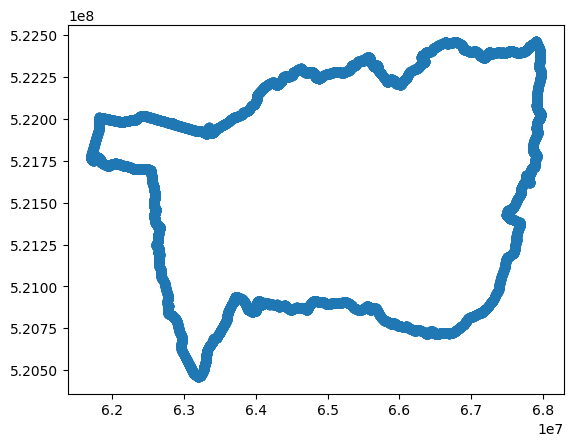

In [21]:
import matplotlib.pyplot as plt
plt.scatter(x=data_source['position_long'], y=data_source['position_lat'])
plt.show()

In [35]:
import plotly.express as px

#fig = px.scatter_geo(data_source,lat='position_lat',lon='position_long')
fig = px.scatter_mapbox(data_source, 
                        lat="latitude", 
                        lon="longitude", 
                        zoom=15, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [40]:
# Define a function to convert fixed-point coordinates to latitude and longitude in degrees
def fixed_to_degrees(value):
    degrees = float(value) / ((2**32) / 360)
    return degrees

In [78]:
import pandas as pd
import plotly.express as px

def plot_map(data_file):
    """Plots latitude and longitude data from a CSV file on a map using Plotly Express.

    Args:
        data_file (str): The path to the CSV file containing the latitude and longitude data.

    Returns:
        None
    """

    # Read in the data from the CSV file
    data_source = pd.read_csv(data_file)
    
    # Check if latitude and longitude are in the columns
    if 'latitude' in data_source.columns and 'longitude' in data_source.columns:
        # If latitude and longitude are present, calculate the center point and plot the data using Plotly Express
        center_lat = data_source['latitude'].mean()
        center_lon = data_source['longitude'].mean()
        fig = px.scatter_mapbox(data_source, 
                                lat="latitude", 
                                lon="longitude", 
                                zoom=10,
                                center=dict(lat=center_lat, lon=center_lon),
                                height=800,
                                width=800)
        fig.update_layout(mapbox_style="open-street-map")
        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        
    else:
        # If latitude and longitude are not present, check if position_lat and position_long are in the columns
        if 'position_lat' in data_source.columns and 'position_long' in data_source.columns:
            # If position_lat and position_long are present, convert the values to degrees, calculate the center point, and plot the data
            data_source['latitude'] = data_source['position_lat'].apply(lambda x: fixed_to_degrees(x))
            data_source['longitude'] = data_source['position_long'].apply(lambda x: fixed_to_degrees(x))
            center_lat = data_source['latitude'].mean()
            center_lon = data_source['longitude'].mean()
            fig = px.scatter_mapbox(data_source, 
                                    lat="latitude", 
                                    lon="longitude", 
                                    zoom=10,
                                    center=dict(lat=center_lat, lon=center_lon),
                                    height=800,
                                    width=800)
            fig.update_layout(mapbox_style="open-street-map")
            fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
            
        else:
            # If latitude, longitude, position_lat, and position_long are not present, print an error message
            print('Error: latitude and longitude, or position_lat and position_long, columns not found in data')

    return fig

In [77]:
activity_map = plot_map("data/activities_csv/8445075763.csv")
# Save plot as PNG file
pio.write_image(activity_map, 'visuals/activity_map.png', width=1000, height=600)